In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [219]:
from sklearn.model_selection import train_test_split

In [222]:
from sklearn.ensemble import RandomForestRegressor

In [225]:
from sklearn.preprocessing import StandardScaler

In [235]:
from sklearn.metrics import r2_score,confusion_matrix

In [242]:
from sklearn.linear_model import LinearRegression

In [250]:
import xgboost as xgb

In [6]:
df=pd.read_csv("Life Expectancy Data.csv")


In [7]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [10]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

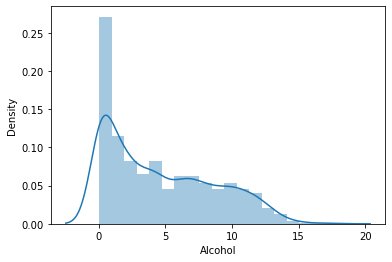

In [11]:
sns.distplot(df['Alcohol'])

In [12]:
df['Alcohol'].fillna(df['Alcohol'].median(),inplace=True)


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hepatitis B', ylabel='Density'>

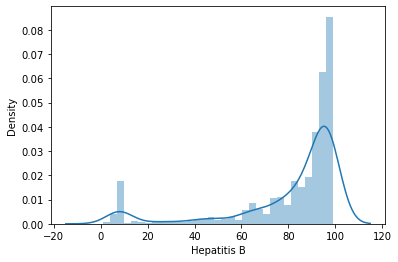

In [13]:
sns.distplot(df['Hepatitis B'])

In [14]:
median=df['Hepatitis B'].median()


In [15]:
df['Hepatitis B']=df['Hepatitis B'].fillna(median)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' BMI ', ylabel='Density'>

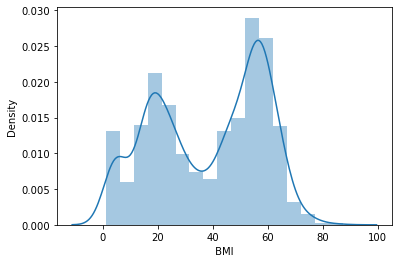

In [16]:
sns.distplot(df[' BMI '])

In [17]:
median=df[' BMI '].median()


In [18]:
df[' BMI ']=df[' BMI '].fillna(median)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Polio', ylabel='Density'>

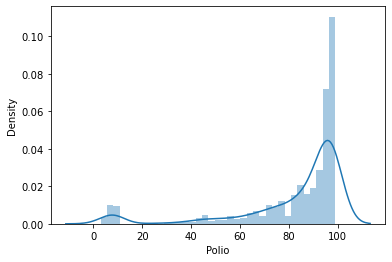

In [19]:
sns.distplot(df['Polio'])

In [20]:
median=df['Polio'].median()

In [21]:
df['Polio']=df['Polio'].fillna(median)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total expenditure', ylabel='Density'>

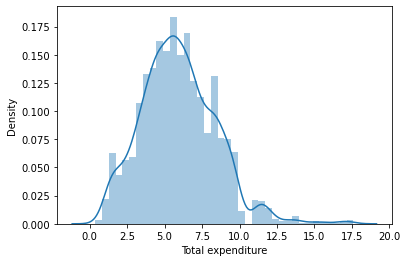

In [22]:
sns.distplot(df['Total expenditure'])

In [23]:
median=df['Total expenditure'].median()

In [24]:
df['Total expenditure']=df['Total expenditure'].fillna(median)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Diphtheria ', ylabel='Density'>

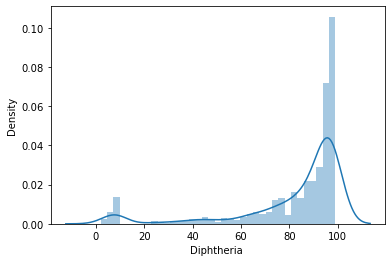

In [25]:
sns.distplot(df['Diphtheria '])

In [26]:
median=df['Diphtheria '].median()

In [27]:
df['Diphtheria ']=df['Diphtheria '].fillna(median)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP', ylabel='Density'>

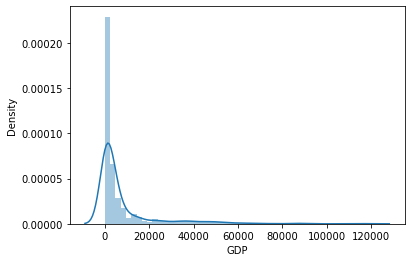

In [28]:
sns.distplot(df['GDP'])

In [29]:
median=df['GDP'].median()

In [30]:
df['GDP']=df['GDP'].fillna(median)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP', ylabel='Density'>

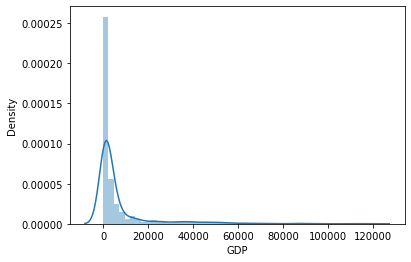

In [31]:
sns.distplot(df['GDP'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

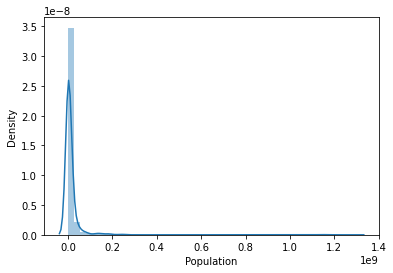

In [32]:
sns.distplot(df['Population'])

In [33]:
df['Population'].fillna(df['Population'].median(),inplace=True)


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' thinness 5-9 years', ylabel='Density'>

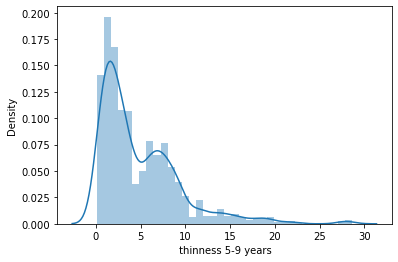

In [34]:
sns.distplot(df[' thinness 5-9 years'])

In [35]:
df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].median(),inplace=True)


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' thinness  1-19 years', ylabel='Density'>

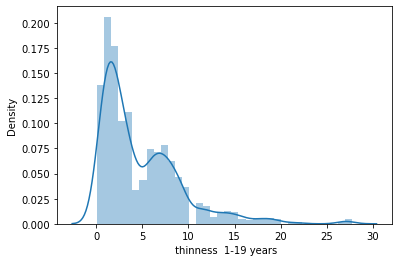

In [36]:
sns.distplot(df[' thinness  1-19 years'])

In [37]:
df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].median(),inplace=True)


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income composition of resources', ylabel='Density'>

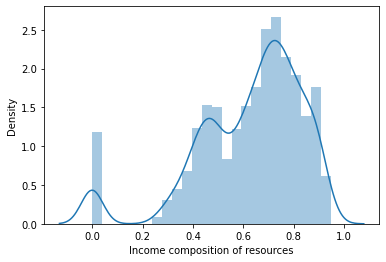

In [38]:
sns.distplot(df['Income composition of resources'])

In [39]:
df['Income composition of resources'].fillna(df['Income composition of resources'].median(),inplace=True)

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Schooling', ylabel='Density'>

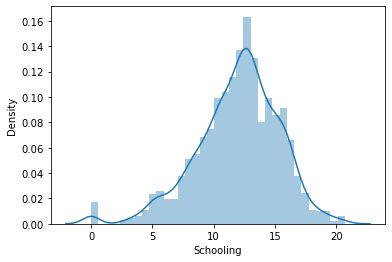

In [40]:
sns.distplot(df['Schooling'])

In [41]:
df['Schooling']=df['Schooling'].fillna(df['Schooling'].median())

In [42]:
df.isnull().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                    10
Adult Mortality                    10
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
 BMI                                0
under-five deaths                   0
Polio                               0
Total expenditure                   0
Diphtheria                          0
 HIV/AIDS                           0
GDP                                 0
Population                          0
 thinness  1-19 years               0
 thinness 5-9 years                 0
Income composition of resources     0
Schooling                           0
dtype: int64

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Life expectancy ', ylabel='Density'>

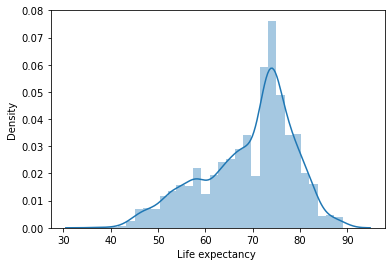

In [43]:
sns.distplot(df['Life expectancy '])


In [44]:
df['Life expectancy ']=df['Life expectancy '].fillna(df['Life expectancy '].median())


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Adult Mortality', ylabel='Density'>

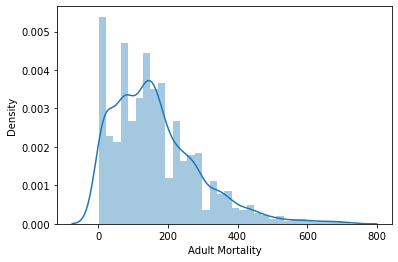

In [45]:
sns.distplot(df['Adult Mortality'])

In [46]:
df['Adult Mortality']=df['Adult Mortality'].fillna(df['Adult Mortality'].median())


In [47]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [48]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<AxesSubplot:xlabel='Status', ylabel='Life expectancy '>

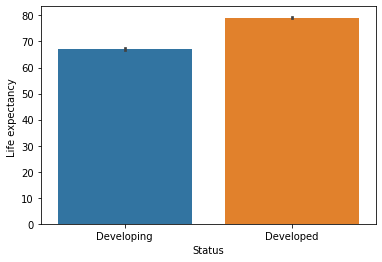

In [49]:
sns.barplot(x=df['Status'],y=df['Life expectancy '])

<AxesSubplot:xlabel='Year', ylabel='Life expectancy '>

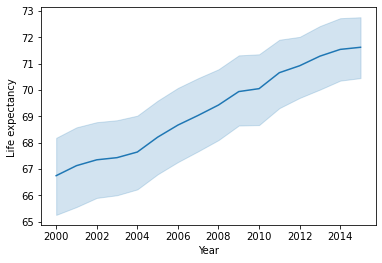

In [50]:
sns.lineplot(x=df['Year'],y=df['Life expectancy '])

In [51]:
label_df=df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False).index


In [52]:
value_df=df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False).values


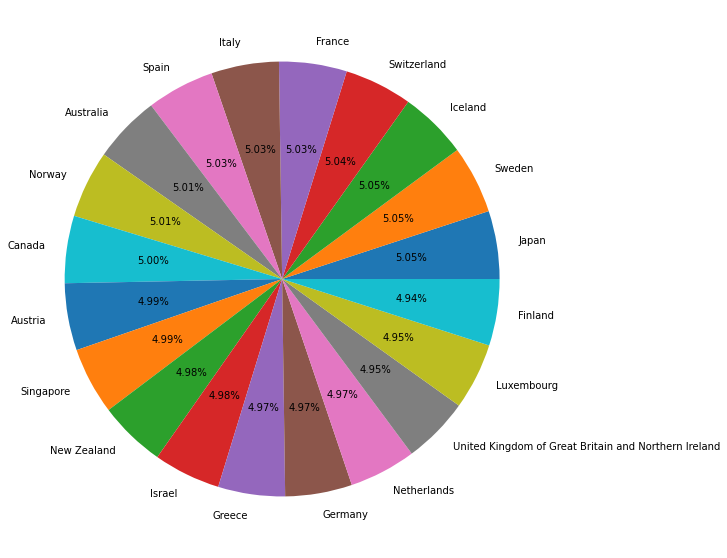

In [53]:
plt.figure(figsize=(15,10))
plt.pie(x=value_df[:20],labels=label_df[:20],autopct="%1.2f%%")
plt.show()

In [54]:
label_df=df.groupby('Status')['Life expectancy '].mean().sort_values(ascending=False).index


In [55]:
value_df=df.groupby('Status')['Life expectancy '].mean().sort_values(ascending=False).values


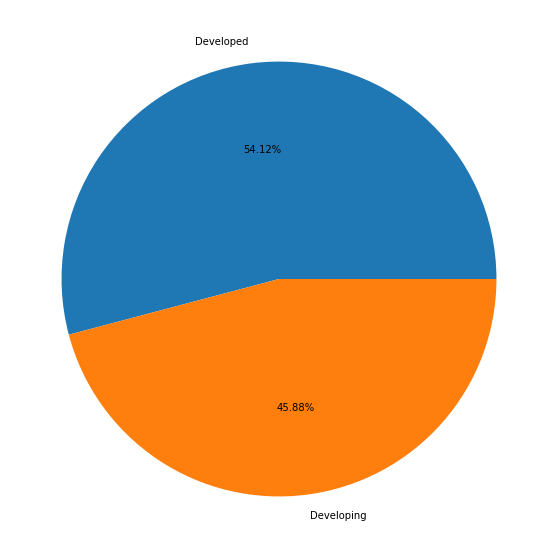

In [56]:
plt.figure(figsize=(15,10))
plt.pie(x=value_df[:20],labels=label_df[:20],autopct="%1.2f%%")
plt.show()

In [57]:
df['Life expectancy Range']=pd.qcut(df['Life expectancy '],5)


In [58]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy Range
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,"(59.9, 68.7]"
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,"(36.299, 59.9]"
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,"(36.299, 59.9]"
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,"(36.299, 59.9]"
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,"(36.299, 59.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,"(36.299, 59.9]"
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,"(36.299, 59.9]"
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,"(36.299, 59.9]"
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,"(36.299, 59.9]"


<AxesSubplot:xlabel='Life expectancy Range', ylabel='Alcohol'>

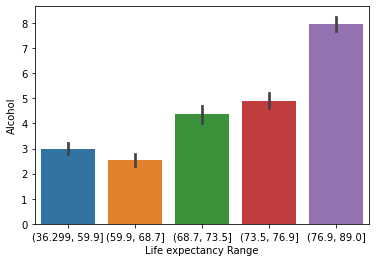

In [59]:
sns.barplot(x=df['Life expectancy Range'],y=df['Alcohol'])

<AxesSubplot:xlabel='Life expectancy Range', ylabel=' HIV/AIDS'>

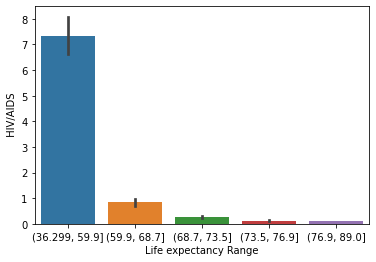

In [60]:
sns.barplot(x=df['Life expectancy Range'],y=df[' HIV/AIDS'])

<AxesSubplot:xlabel='Life expectancy Range', ylabel='Diphtheria '>

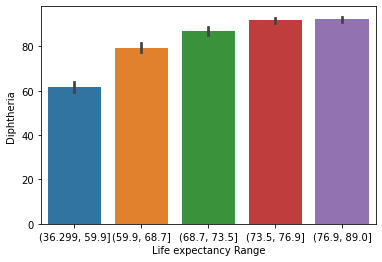

In [61]:
sns.barplot(x=df['Life expectancy Range'],y=df['Diphtheria '])

<AxesSubplot:xlabel='Life expectancy Range', ylabel='Measles '>

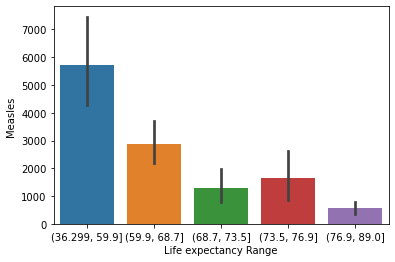

In [62]:
sns.barplot(x=df['Life expectancy Range'],y=df['Measles '])

In [63]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling',
       'Life expectancy Range'],
      dtype='object')

<AxesSubplot:xlabel='Life expectancy Range', ylabel=' BMI '>

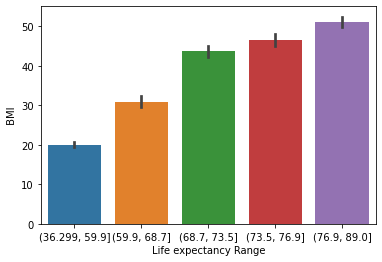

In [64]:
sns.barplot(x=df['Life expectancy Range'],y=df[' BMI '])

<AxesSubplot:xlabel='Life expectancy Range', ylabel='Polio'>

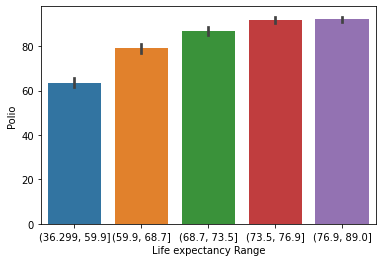

In [65]:
sns.barplot(x=df['Life expectancy Range'],y=df['Polio'])

<AxesSubplot:xlabel='Life expectancy Range', ylabel='under-five deaths '>

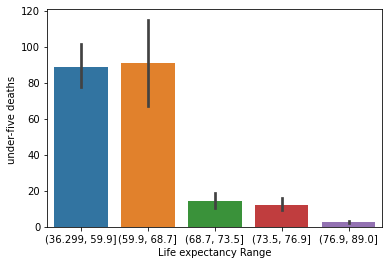

In [66]:
sns.barplot(x=df['Life expectancy Range'],y=df['under-five deaths '])

In [67]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy Range
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,"(59.9, 68.7]"
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,"(36.299, 59.9]"
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,"(36.299, 59.9]"
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,"(36.299, 59.9]"
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,"(36.299, 59.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,"(36.299, 59.9]"
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,"(36.299, 59.9]"
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,"(36.299, 59.9]"
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,"(36.299, 59.9]"


<AxesSubplot:xlabel='Income composition of resources', ylabel='Life expectancy '>

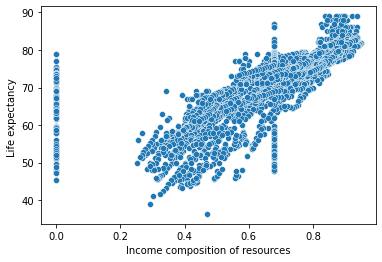

In [68]:
sns.scatterplot(x=df['Income composition of resources'],y=df['Life expectancy '])

<AxesSubplot:>

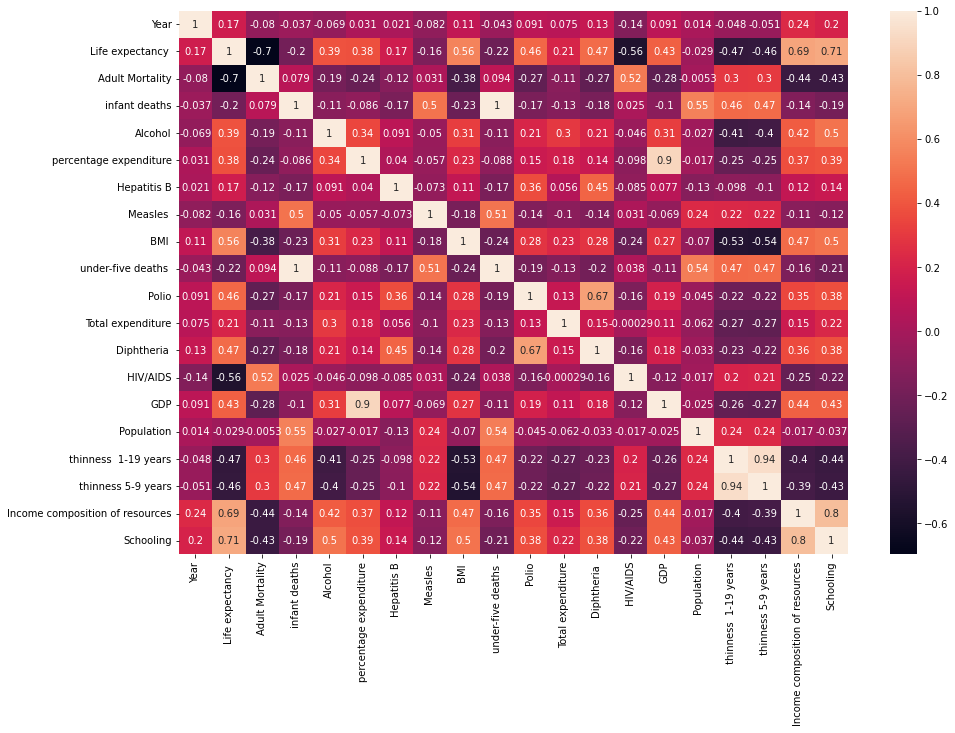

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)


<AxesSubplot:xlabel='Life expectancy ', ylabel='Adult Mortality'>

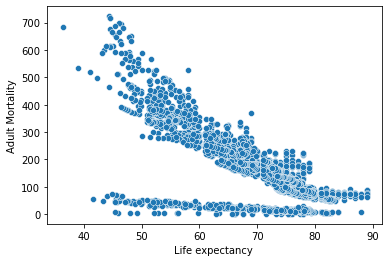

In [70]:
sns.scatterplot(x=df['Life expectancy '],y=df['Adult Mortality'])

<AxesSubplot:xlabel='Life expectancy Range', ylabel=' thinness  1-19 years'>

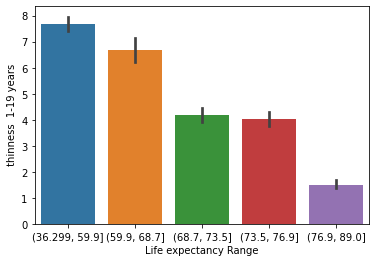

In [71]:
sns.barplot(x=df['Life expectancy Range'],y=df[' thinness  1-19 years'])

<AxesSubplot:xlabel='Life expectancy Range', ylabel=' thinness 5-9 years'>

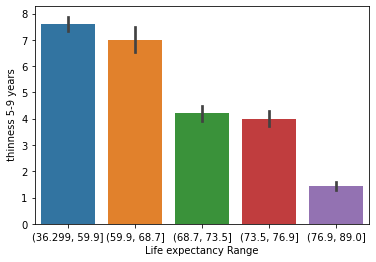

In [72]:
sns.barplot(x=df['Life expectancy Range'],y=df[' thinness 5-9 years'])

<AxesSubplot:xlabel='Life expectancy Range', ylabel='Schooling'>

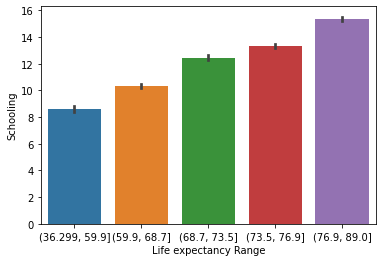

In [73]:
sns.barplot(x=df['Life expectancy Range'],y=df['Schooling'])

In [74]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy Range
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,"(59.9, 68.7]"
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,"(36.299, 59.9]"
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,"(36.299, 59.9]"
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,"(36.299, 59.9]"
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,"(36.299, 59.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,"(36.299, 59.9]"
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,"(36.299, 59.9]"
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,"(36.299, 59.9]"
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,"(36.299, 59.9]"


In [75]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.234717,164.725664,30.303948,4.546875,738.251295,83.022124,2419.592240,38.381178,42.035739,82.617767,5.924098,82.393125,1.742103,6611.523863,1.023085e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,9.509115,124.086215,117.926501,3.921946,1987.914858,22.996984,11467.272489,19.935375,160.445548,23.367166,2.400770,23.655562,5.077785,13296.603449,5.402242e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.755000,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year'>

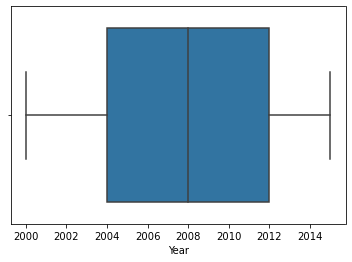

In [76]:
sns.boxplot(df['Year'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='infant deaths'>

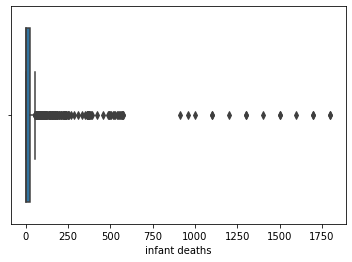

In [77]:
sns.boxplot(df['infant deaths'])

In [78]:
q1=df['infant deaths'].quantile(0.25)

In [79]:
q3=df['infant deaths'].quantile(0.75)

In [80]:
IQR=q3-q1

In [81]:
lower=q1-1.5*IQR

In [82]:
upper=q3+1.5*IQR

In [83]:
df=df[(df['infant deaths']>lower) & (df['infant deaths']<upper)]

In [84]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy Range
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,"(76.9, 89.0]"
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,"(76.9, 89.0]"
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,"(76.9, 89.0]"
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,"(73.5, 76.9]"
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,"(73.5, 76.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,"(36.299, 59.9]"
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,"(36.299, 59.9]"
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,"(36.299, 59.9]"
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,"(36.299, 59.9]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='infant deaths'>

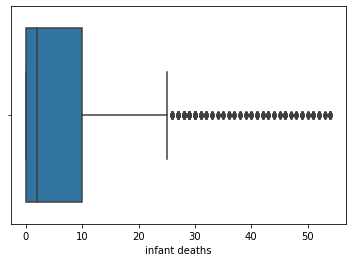

In [85]:
sns.boxplot(df['infant deaths'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='percentage expenditure'>

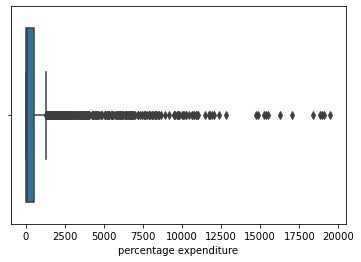

In [86]:
sns.boxplot(df['percentage expenditure'])

In [87]:
q1=df['percentage expenditure'].quantile(0.25)

In [88]:
q3=df['percentage expenditure'].quantile(0.75)

In [89]:
IQR=q3-q1

In [90]:
lower=q1-1.5*IQR

In [91]:
upper=q3+1.5*IQR

In [92]:
df=df[(df['percentage expenditure']>lower) & (df['percentage expenditure']<upper)]

In [93]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy Range
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,"(76.9, 89.0]"
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,"(76.9, 89.0]"
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,"(76.9, 89.0]"
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,"(73.5, 76.9]"
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,"(73.5, 76.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,"(36.299, 59.9]"
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,"(36.299, 59.9]"
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,"(36.299, 59.9]"
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,"(36.299, 59.9]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='percentage expenditure'>

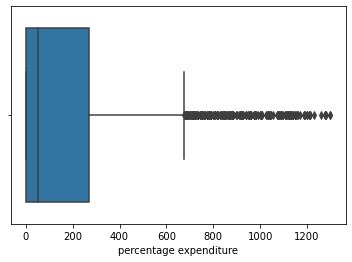

In [94]:
sns.boxplot(df['percentage expenditure'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='under-five deaths '>

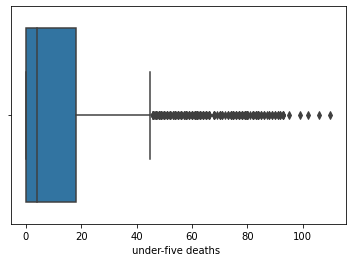

In [95]:
sns.boxplot(df['under-five deaths '])

In [96]:
q1=df['under-five deaths '].quantile(0.25)

In [97]:
q3=df['under-five deaths '].quantile(0.75)

In [98]:
IQR=q3-q1

In [99]:
lower=q1-1.5*IQR

In [100]:
upper=q3+1.5*IQR

In [101]:
df=df[(df['under-five deaths ']>lower) & (df['under-five deaths ']<upper)]

In [102]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy Range
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,"(76.9, 89.0]"
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,"(76.9, 89.0]"
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,"(76.9, 89.0]"
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,"(73.5, 76.9]"
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,"(73.5, 76.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,"(36.299, 59.9]"
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,"(36.299, 59.9]"
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,"(36.299, 59.9]"
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,"(36.299, 59.9]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='under-five deaths '>

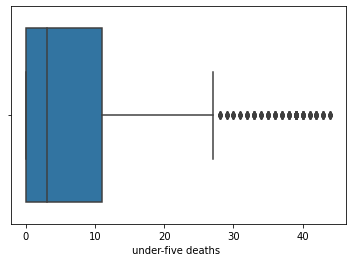

In [103]:
sns.boxplot(df['under-five deaths '])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP'>

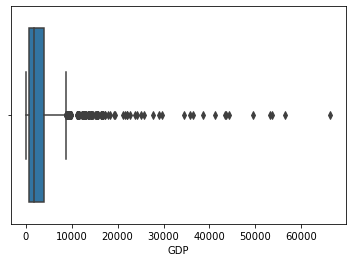

In [104]:
sns.boxplot(df['GDP'])

In [105]:
q1=df['GDP'].quantile(0.25)

In [106]:
q3=df['GDP'].quantile(0.75)

In [107]:
IQR=q3-q1

In [108]:
lower=q1-1.5*IQR

In [109]:
upper=q3+1.5*IQR

In [110]:
df=df[(df['GDP']>lower) & (df['GDP']<upper)]

In [111]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy Range
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,"(76.9, 89.0]"
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,"(76.9, 89.0]"
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,"(76.9, 89.0]"
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,"(73.5, 76.9]"
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,"(73.5, 76.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,"(36.299, 59.9]"
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,"(36.299, 59.9]"
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,"(36.299, 59.9]"
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,"(36.299, 59.9]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP'>

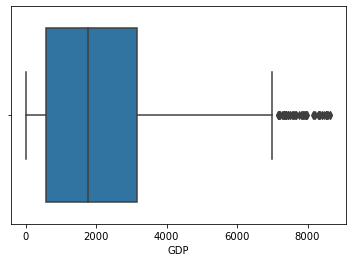

In [112]:
sns.boxplot(df['GDP'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total expenditure'>

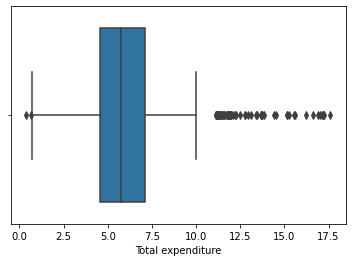

In [113]:
sns.boxplot(df['Total expenditure'])

In [114]:
q1=df['Total expenditure'].quantile(0.25)

In [115]:
q3=df['Total expenditure'].quantile(0.75)

In [116]:
IQR=q3-q1

In [117]:
lower=q1-1.5*IQR

In [118]:
upper=q3+1.5*IQR

In [119]:
df=df[(df['Total expenditure']>lower) & (df['Total expenditure']<upper)]

In [120]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy Range
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,"(76.9, 89.0]"
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,"(76.9, 89.0]"
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,"(76.9, 89.0]"
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,"(73.5, 76.9]"
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,"(73.5, 76.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,"(36.299, 59.9]"
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,"(36.299, 59.9]"
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,"(36.299, 59.9]"
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,"(36.299, 59.9]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total expenditure'>

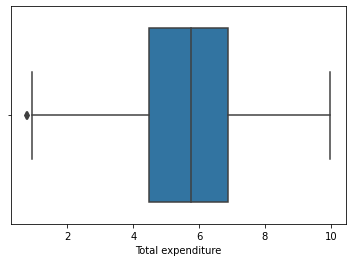

In [121]:
sns.boxplot(df['Total expenditure'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' BMI '>

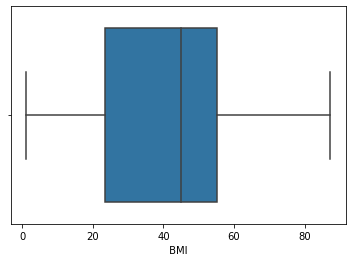

In [122]:
sns.boxplot(df[' BMI '])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol'>

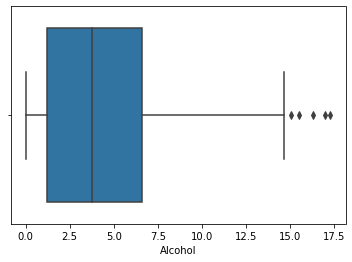

In [123]:
sns.boxplot(df['Alcohol'])

In [124]:
q1=df['Alcohol'].quantile(0.25)

In [125]:
q3=df['Alcohol'].quantile(0.75)

In [126]:
IQR=q3-q1

In [127]:
lower=q1-1.5*IQR

In [128]:
upper=q3+1.5*IQR

In [129]:
df=df[(df['Alcohol']>lower) & (df['Alcohol']<upper)]

In [130]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy Range
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,"(76.9, 89.0]"
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,"(76.9, 89.0]"
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,"(76.9, 89.0]"
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,"(73.5, 76.9]"
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,"(73.5, 76.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,"(36.299, 59.9]"
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,"(36.299, 59.9]"
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,"(36.299, 59.9]"
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,"(36.299, 59.9]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hepatitis B'>

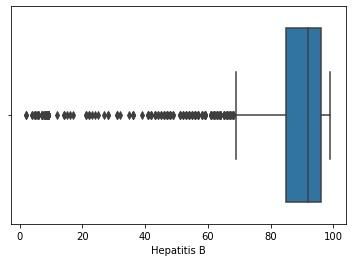

In [131]:
sns.boxplot(df['Hepatitis B'])

In [132]:
q1=df['Hepatitis B'].quantile(0.25)

In [133]:
q3=df['Hepatitis B'].quantile(0.75)

In [134]:
IQR=q3-q1

In [135]:
lower=q1-1.5*IQR

In [136]:
upper=q3+1.5*IQR

In [137]:
df=df[(df['Hepatitis B']>lower) & (df['Hepatitis B']<upper)]

In [138]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy Range
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,"(76.9, 89.0]"
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,"(76.9, 89.0]"
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,"(76.9, 89.0]"
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,"(73.5, 76.9]"
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,"(73.5, 76.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8,"(36.299, 59.9]"
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1,"(36.299, 59.9]"
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,"(36.299, 59.9]"
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,"(36.299, 59.9]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Schooling'>

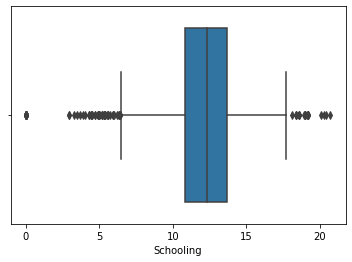

In [139]:
sns.boxplot(df['Schooling'])

In [140]:
q1=df['Schooling'].quantile(0.25)

In [141]:
q3=df['Schooling'].quantile(0.75)

In [142]:
IQR=q3-q1

In [143]:
lower=q1-1.5*IQR

In [144]:
upper=q3+1.5*IQR

In [145]:
df=df[(df['Schooling']>lower) & (df['Schooling']<upper)]

In [146]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy Range
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,"(76.9, 89.0]"
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,"(76.9, 89.0]"
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,"(76.9, 89.0]"
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,"(73.5, 76.9]"
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,"(73.5, 76.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8,"(36.299, 59.9]"
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1,"(36.299, 59.9]"
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,"(36.299, 59.9]"
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,"(36.299, 59.9]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' thinness  1-19 years'>

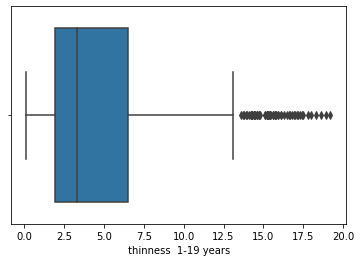

In [147]:
sns.boxplot(df[' thinness  1-19 years'])

In [148]:
q1=df[' thinness  1-19 years'].quantile(0.25)

In [149]:
q3=df[' thinness  1-19 years'].quantile(0.75)

In [150]:
IQR=q3-q1

In [151]:
lower=q1-1.5*IQR

In [152]:
upper=q3+1.5*IQR

In [153]:
df=df[(df[' thinness  1-19 years']>lower) & (df[' thinness  1-19 years']<upper)]

In [154]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy Range
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,"(76.9, 89.0]"
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,"(76.9, 89.0]"
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,"(76.9, 89.0]"
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,"(73.5, 76.9]"
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,"(73.5, 76.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8,"(36.299, 59.9]"
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1,"(36.299, 59.9]"
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,"(36.299, 59.9]"
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,"(36.299, 59.9]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' thinness 5-9 years'>

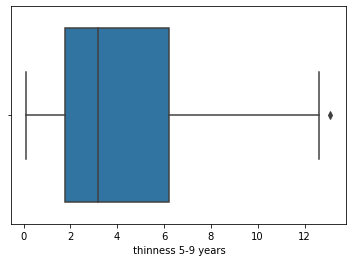

In [155]:
sns.boxplot(df[' thinness 5-9 years'])

In [156]:
q1=df[' thinness 5-9 years'].quantile(0.25)

In [157]:
q3=df[' thinness 5-9 years'].quantile(0.75)

In [158]:
IQR=q3-q1

In [159]:
lower=q1-1.5*IQR

In [160]:
upper=q3+1.5*IQR

In [161]:
df=df[(df[' thinness 5-9 years']>lower) & (df[' thinness 5-9 years']<upper)]

In [162]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy Range
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,"(76.9, 89.0]"
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2,"(76.9, 89.0]"
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2,"(76.9, 89.0]"
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2,"(73.5, 76.9]"
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3,"(73.5, 76.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8,"(36.299, 59.9]"
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1,"(36.299, 59.9]"
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,"(36.299, 59.9]"
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,"(36.299, 59.9]"


In [163]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1415.000000,1.415000e+03,1415.000000,1415.000000,1415.000000,1415.000000
mean,2007.508834,70.652155,150.915194,5.413428,4.699629,186.134932,92.214841,502.148410,41.296678,6.973852,88.122261,5.788809,88.763251,1.370106,2280.206017,4.889451e+06,3.977739,3.969823,0.643807,12.445442
std,4.617141,7.386770,106.705486,7.511573,3.714401,250.611017,6.359386,2399.916301,18.702413,9.957762,18.720792,1.947558,17.046149,5.134536,2021.299147,1.323069e+07,2.805214,2.822816,0.179443,2.132454
min,2000.000000,44.500000,1.000000,0.000000,0.010000,0.000000,69.000000,0.000000,2.000000,0.000000,3.000000,0.740000,3.000000,0.100000,3.685949,4.300000e+01,0.100000,0.100000,0.000000,6.500000
25%,2003.000000,66.900000,78.000000,0.000000,1.555000,2.012414,91.000000,0.000000,26.700000,0.000000,87.000000,4.605000,87.000000,0.100000,651.051770,3.476795e+05,1.800000,1.750000,0.589000,11.100000
50%,2008.000000,72.600000,144.000000,2.000000,3.780000,60.341451,93.000000,1.000000,46.900000,3.000000,95.000000,5.755000,95.000000,0.100000,1766.947595,1.386542e+06,3.200000,3.200000,0.683000,12.400000
75%,2011.000000,75.000000,196.000000,8.000000,7.100000,290.379471,97.000000,67.500000,55.800000,10.000000,98.000000,6.905000,98.000000,0.400000,3458.590312,2.937416e+06,6.300000,6.200000,0.747000,13.850000
max,2015.000000,89.000000,699.000000,36.000000,14.670000,1199.319976,99.000000,42724.000000,87.300000,44.000000,99.000000,9.980000,99.000000,50.300000,8643.494400,1.465966e+08,12.600000,12.600000,0.948000,17.700000


In [164]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling',
       'Life expectancy Range'],
      dtype='object')

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Life expectancy ', ylabel='Density'>

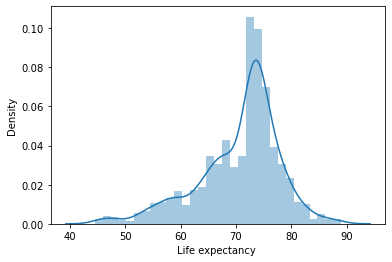

In [165]:
sns.distplot(df['Life expectancy '])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Adult Mortality', ylabel='Density'>

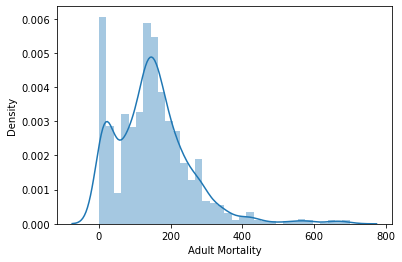

In [166]:
sns.distplot(df['Adult Mortality'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

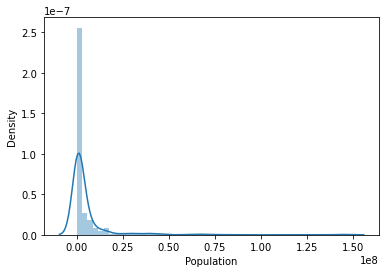

In [167]:
sns.distplot(df['Population'])

In [168]:
df['Population']=np.log(df['Population'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_25092\949333151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population']=np.log(df['Population'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Population', ylabel='Density'>

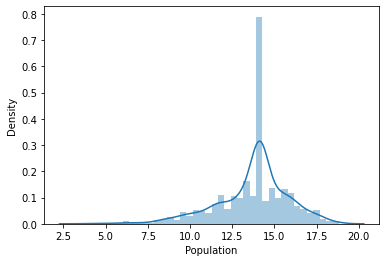

In [169]:
sns.distplot(df['Population'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP', ylabel='Density'>

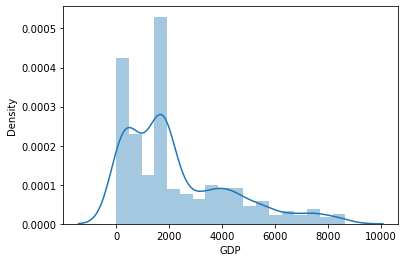

In [170]:
sns.distplot(df['GDP'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='infant deaths', ylabel='Density'>

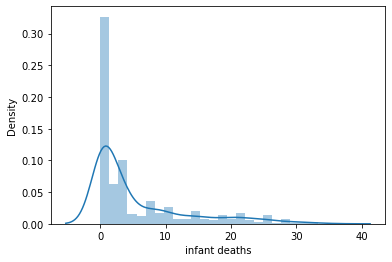

In [171]:
sns.distplot(df['infant deaths'])

In [172]:
df['infant deaths']=np.log(df['infant deaths'])


C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\himanshu\AppData\Local\Temp\ipykernel_25092\3859541026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['infant deaths']=np.log(df['infant deaths'])


In [173]:
df=df[df['infant deaths']>0]


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='infant deaths', ylabel='Density'>

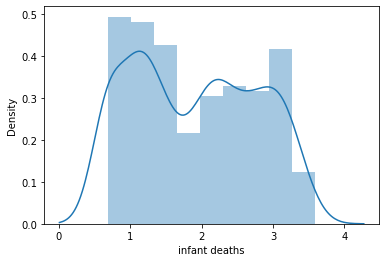

In [174]:
sns.distplot(df['infant deaths'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

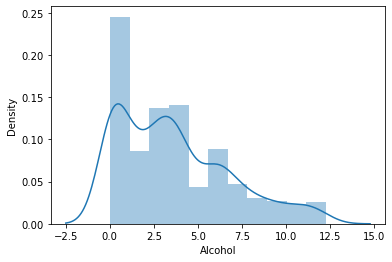

In [175]:
sns.distplot(df['Alcohol'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='percentage expenditure', ylabel='Density'>

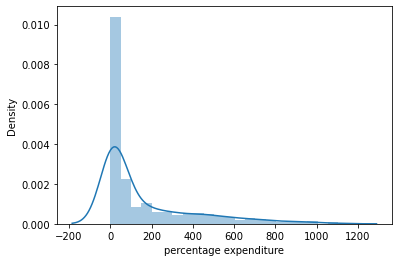

In [176]:
sns.distplot(df['percentage expenditure'])

In [177]:
df['percentage expenditure']=np.log(df['percentage expenditure'])


C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\himanshu\AppData\Local\Temp\ipykernel_25092\1047597731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['percentage expenditure']=np.log(df['percentage expenditure'])


In [179]:
df=df[df['percentage expenditure']>0]
             

<AxesSubplot:xlabel='percentage expenditure', ylabel='Density'>

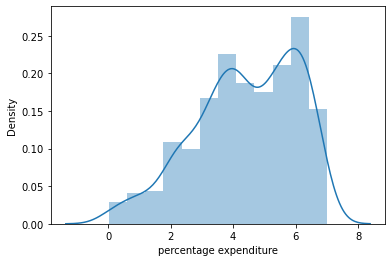

In [180]:
sns.distplot(df['percentage expenditure'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hepatitis B', ylabel='Density'>

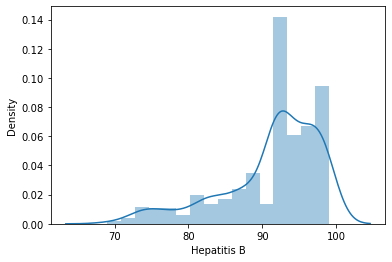

In [181]:
sns.distplot(df['Hepatitis B'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Measles ', ylabel='Density'>

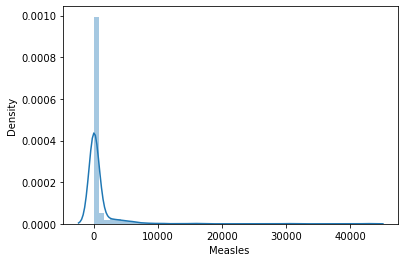

In [185]:
sns.distplot(df['Measles '])

In [186]:
df['Measles ']=np.log(df['Measles '])


C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [188]:
df=df[df['Measles ']>0]


<AxesSubplot:xlabel='Measles ', ylabel='Density'>

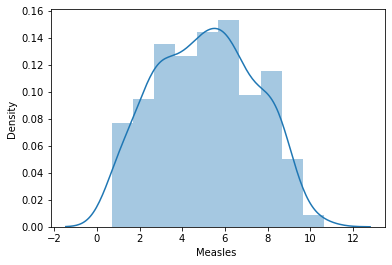

In [189]:
sns.distplot(df['Measles '])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' BMI ', ylabel='Density'>

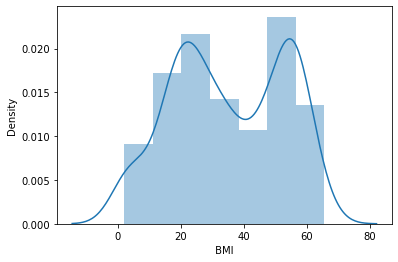

In [192]:
sns.distplot(df[' BMI '])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='under-five deaths ', ylabel='Density'>

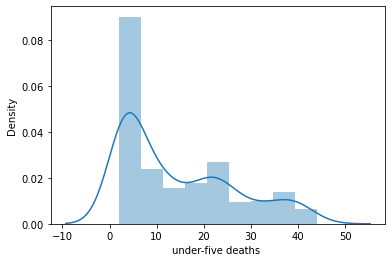

In [194]:
sns.distplot(df['under-five deaths '])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Polio', ylabel='Density'>

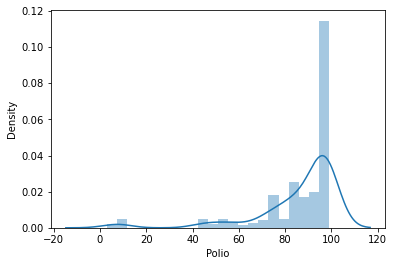

In [195]:
sns.distplot(df['Polio'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total expenditure', ylabel='Density'>

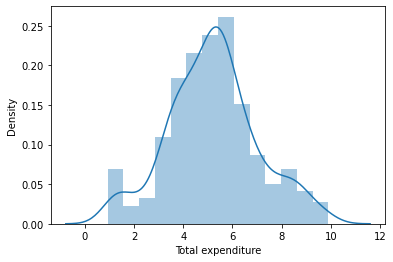

In [202]:
sns.distplot(df['Total expenditure'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Diphtheria ', ylabel='Density'>

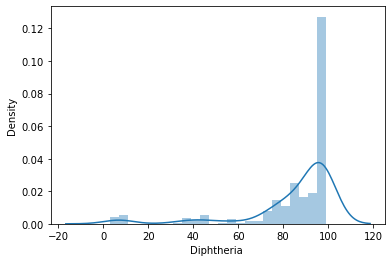

In [204]:
sns.distplot(df['Diphtheria '])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Schooling', ylabel='Density'>

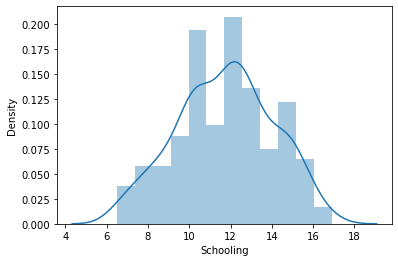

In [207]:
sns.distplot(df['Schooling'])

In [208]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy Range
34,Algeria,2013,Developing,75.3,112.0,3.044522,0.53,6.299777,4.553877,3.218876,...,7.12,4.553877,0.1,5471.866766,17.461967,5.9,5.8,0.737,14.4,"(73.5, 76.9]"
35,Algeria,2012,Developing,75.1,113.0,3.044522,0.66,6.320635,4.553877,2.890372,...,6.14,4.553877,0.1,5564.825660,17.441606,5.9,5.8,0.732,14.4,"(73.5, 76.9]"
36,Algeria,2011,Developing,74.9,116.0,3.044522,0.56,6.232452,4.553877,4.718499,...,5.29,4.553877,0.1,5432.252300,17.421540,5.9,5.8,0.724,14.0,"(73.5, 76.9]"
37,Algeria,2010,Developing,74.7,119.0,3.044522,0.45,6.065453,4.553877,4.634729,...,5.12,4.553877,0.1,4463.394675,17.402292,5.9,5.8,0.714,13.6,"(73.5, 76.9]"
38,Algeria,2009,Developing,74.4,123.0,2.995732,0.50,5.863812,4.543295,4.672829,...,5.36,4.553877,0.1,3868.831230,15.081493,6.0,5.9,0.705,13.1,"(73.5, 76.9]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,Uzbekistan,2000,Developing,67.1,189.0,3.401197,1.60,3.881758,4.521789,4.382027,...,5.29,4.595120,0.1,558.221144,10.112694,3.4,3.4,0.000,10.6,"(59.9, 68.7]"
2907,Zambia,2014,Developing,61.1,314.0,3.332205,0.01,5.281515,4.454347,2.197225,...,4.99,4.454347,4.3,1738.882200,14.262101,6.3,6.2,0.570,12.5,"(59.9, 68.7]"
2908,Zambia,2013,Developing,63.0,328.0,3.367296,2.41,3.026410,4.369448,3.555348,...,4.99,4.369448,4.8,185.793359,14.231138,6.4,6.2,0.565,12.5,"(59.9, 68.7]"
2909,Zambia,2012,Developing,59.2,349.0,3.367296,2.59,5.282773,4.356709,6.797940,...,4.91,4.356709,5.6,1734.936120,16.503354,6.5,6.3,0.554,12.3,"(36.299, 59.9]"


In [210]:
df=df.drop('Life expectancy Range',axis=1)


In [211]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
34,Algeria,2013,Developing,75.3,112.0,3.044522,0.53,6.299777,4.553877,3.218876,...,2.133981,7.12,4.553877,0.1,5471.866766,17.461967,5.9,5.8,0.737,14.4
35,Algeria,2012,Developing,75.1,113.0,3.044522,0.66,6.320635,4.553877,2.890372,...,2.133981,6.14,4.553877,0.1,5564.825660,17.441606,5.9,5.8,0.732,14.4
36,Algeria,2011,Developing,74.9,116.0,3.044522,0.56,6.232452,4.553877,4.718499,...,2.133981,5.29,4.553877,0.1,5432.252300,17.421540,5.9,5.8,0.724,14.0
37,Algeria,2010,Developing,74.7,119.0,3.044522,0.45,6.065453,4.553877,4.634729,...,2.133981,5.12,4.553877,0.1,4463.394675,17.402292,5.9,5.8,0.714,13.6
38,Algeria,2009,Developing,74.4,123.0,2.995732,0.50,5.863812,4.543295,4.672829,...,2.131501,5.36,4.553877,0.1,3868.831230,15.081493,6.0,5.9,0.705,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,Uzbekistan,2000,Developing,67.1,189.0,3.401197,1.60,3.881758,4.521789,4.382027,...,2.143623,5.29,4.595120,0.1,558.221144,10.112694,3.4,3.4,0.000,10.6
2907,Zambia,2014,Developing,61.1,314.0,3.332205,0.01,5.281515,4.454347,2.197225,...,2.087273,4.99,4.454347,4.3,1738.882200,14.262101,6.3,6.2,0.570,12.5
2908,Zambia,2013,Developing,63.0,328.0,3.367296,2.41,3.026410,4.369448,3.555348,...,2.074624,4.99,4.369448,4.8,185.793359,14.231138,6.4,6.2,0.565,12.5
2909,Zambia,2012,Developing,59.2,349.0,3.367296,2.59,5.282773,4.356709,6.797940,...,1.394959,4.91,4.356709,5.6,1734.936120,16.503354,6.5,6.3,0.554,12.3


In [212]:
le=LabelEncoder()

In [213]:
df['Country']=le.fit_transform(df['Country'])


In [214]:
df['Status']=le.fit_transform(df['Status'])

In [223]:
rfr=RandomForestRegressor()


In [226]:
sc=StandardScaler()

In [227]:
y=df['Life expectancy ']

In [228]:
X=df.drop('Life expectancy ',axis=1)

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [230]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [231]:
y_pred=rfr.predict(X_test)


In [236]:
r2_score(y_test,y_pred)

0.9367061321994501

In [237]:
y_pred=rfr.predict(X_train)


In [238]:
r2_score(y_train,y_pred)

0.9908202652148268

In [243]:
lr=LinearRegression()


In [244]:
lr.fit(X_train,y_train)

LinearRegression()

In [246]:
y_pred=lr.predict(X_test)

In [247]:
r2_score(y_test,y_pred)

0.7148588001492018

In [248]:
y_pred=lr.predict(X_train)

In [249]:
r2_score(y_train,y_pred)

0.8854090316719789

In [252]:
xgb_i=xgb.XGBRegressor()


In [253]:
xgb_i.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [254]:
y_pred=xgb_i.predict(X_test)


In [255]:
r2_score(y_test,y_pred)

0.9584362014908234

In [256]:
y_pred=xgb_i.predict(X_train)


In [257]:
r2_score(y_train,y_pred)

0.999999982948926